In [1]:
import numpy as np
import pandas as pd
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("titles.csv",index_col="id")

In [4]:
df.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,,,
ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
df.shape

(5806, 14)

In [7]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5806 entries, ts300399 to ts271048
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   description           5788 non-null   object 
 3   release_year          5806 non-null   int64  
 4   age_certification     3196 non-null   object 
 5   runtime               5806 non-null   int64  
 6   genres                5806 non-null   object 
 7   production_countries  5806 non-null   object 
 8   seasons               2047 non-null   float64
 9   imdb_id               5362 non-null   object 
 10  imdb_score            5283 non-null   float64
 11  imdb_votes            5267 non-null   float64
 12  tmdb_popularity       5712 non-null   float64
 13  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 809.4+ KB


In [10]:
df.isnull().sum()

title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [11]:
shows = df[df.type == "SHOW"]

In [12]:
shows.isnull().sum()

title                     0
type                      0
description              10
release_year              0
age_certification       257
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 136
imdb_score              171
imdb_votes              171
tmdb_popularity          33
tmdb_score              132
dtype: int64

In [14]:
shows.shape

(2047, 14)

In [15]:
clean_shows = shows.dropna(subset = ['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])
clean_shows.isnull().sum()

title                     0
type                      0
description               1
release_year              0
age_certification       188
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                   0
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
dtype: int64

In [16]:
clean_shows.shape

(1786, 14)

In [18]:
corr_shows = clean_shows.corr()

In [19]:
sns.set(font_scale=1.25)

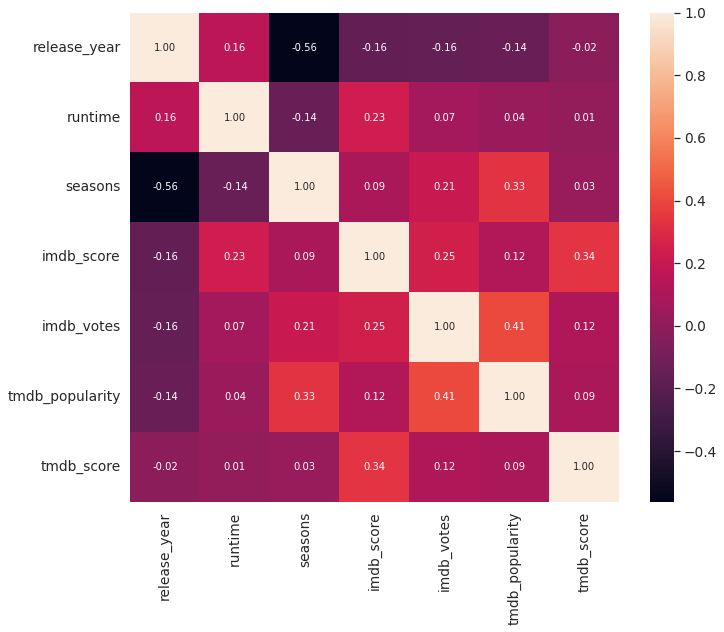

In [21]:
f,ax = plt. subplots(figsize=(11,9))
hm_shows = sns.heatmap(corr_shows,cbar=True, annot=True, square= True,fmt=".2f",annot_kws={"size":10,},
                       yticklabels = corr_shows.index, xticklabels = corr_shows.index)
plt.show()

What year were Netflix Shows Released?

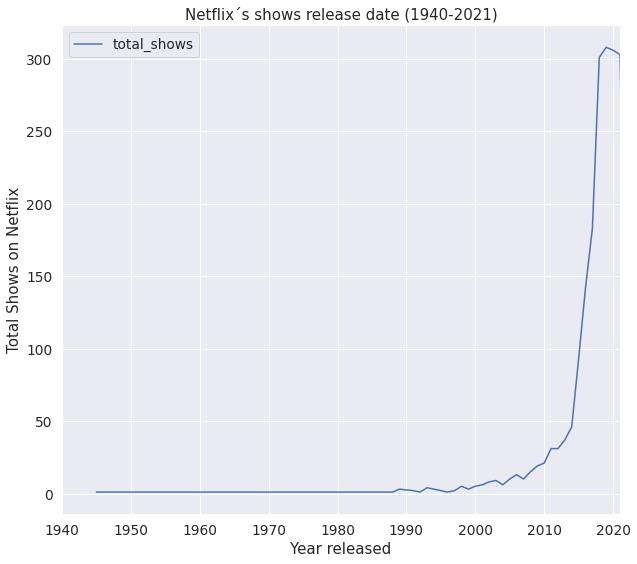

In [22]:
shows_per_year = shows.release_year.value_counts()
shows_per_year = pd.DataFrame(shows_per_year)

shows_per_year.rename(columns = {'release_year' : 'total_shows'}, inplace = True)

plt.figure(figsize=(10, 9))
sns.lineplot(data= shows_per_year)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

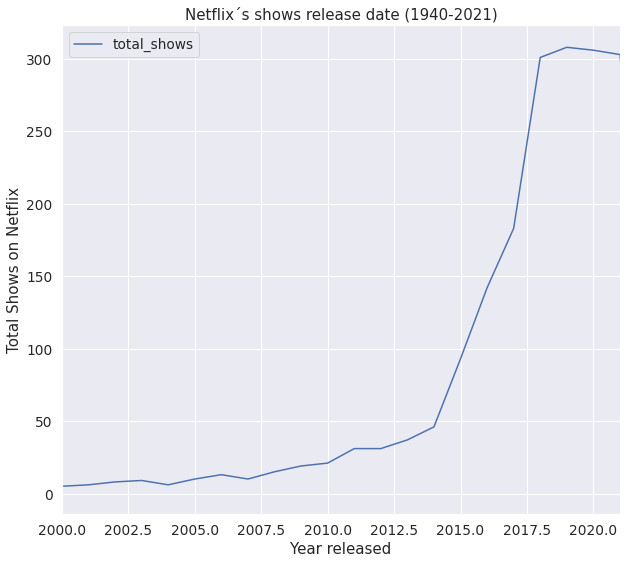

In [23]:
#Let's get a closer look
plt.figure(figsize=(10, 9))
sns.lineplot(data= shows_per_year)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlim(2000, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

In [24]:
# We're going to find the year where the most Netflix shows were released

max_shows = max(shows_per_year.total_shows)
year_with_max_shows= shows_per_year.index[shows_per_year['total_shows'] == max_shows].tolist()
print (f' Most Netflix´s shows were released on: {year_with_max_shows} with a total of {max_shows} shows')

 Most Netflix´s shows were released on: [2019] with a total of 308 shows


Quantity of shows per age_certification

In [25]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0.5, 0, 'Age Certification')

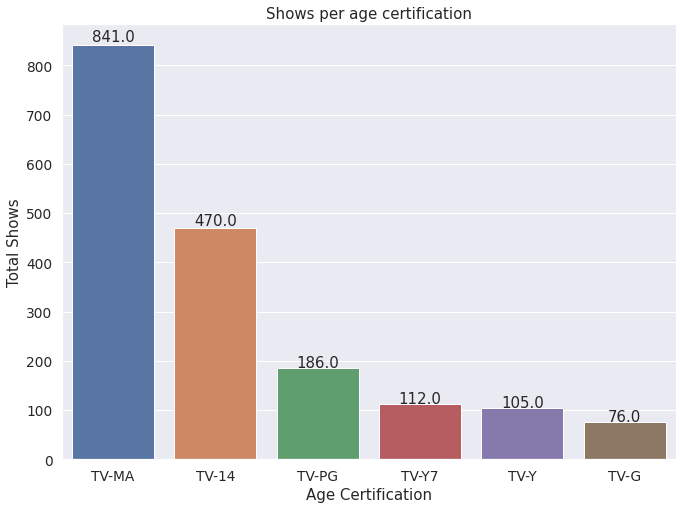

In [27]:
show_cert = shows.age_certification.value_counts()
show_cert = pd.DataFrame(show_cert)
show_cert.rename(columns = {'age_certification':'total_shows'},inplace=True)
plt.figure(figsize=(11,8))
plt.title("Shows per age certification")
b_shows_certification = sns.barplot(x=show_cert.index, y=show_cert["total_shows"], data=show_cert, ci=None)
show_values(b_shows_certification)

plt.ylabel("Total Shows")
plt.xlabel("Age Certification")

Average Runtime

In [28]:
b = max(shows.runtime)
c = min((shows[shows.runtime > 0]).runtime)
a = statistics.mean((shows[shows.runtime > 0]).runtime)
a = int(a)
print(f'The mean duration for an episode is {a} minutes, the maximum is {b} and minimum is {c}')

The mean duration for an episode is 39 minutes, the maximum is 225 and minimum is 2


What country are most shows made in?

Text(0.5, 0, 'Production Country')

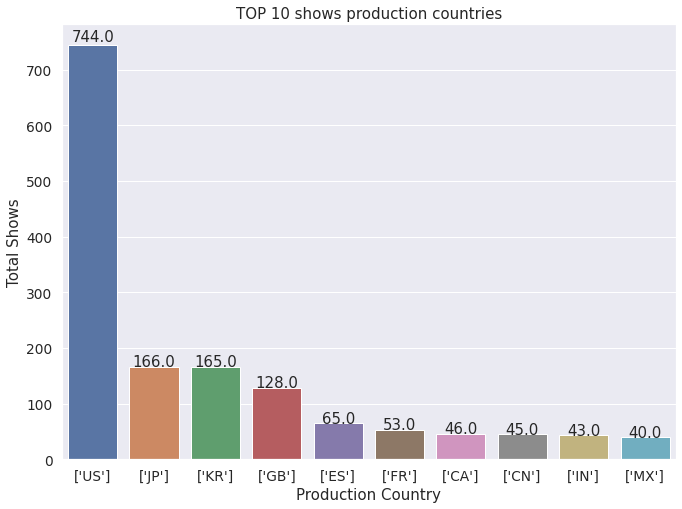

In [31]:
prod_count = shows.production_countries.value_counts()
prod_count = pd.DataFrame(prod_count)
prod_count.rename(columns = {'production_countries':'total_shows'},inplace = True)
prod_count = prod_count.drop('[]')
top_10= prod_count.head(10)

plt.figure(figsize=(11,8))
plt.title("TOP 10 shows production countries")

# Bar chart 
b_top10_countries = sns.barplot(x=top_10.index, y=top_10["total_shows"], data=top_10, ci=None)

#Show values
# I use pre-made function: 
show_values(b_top10_countries)

# Title y-axis
plt.ylabel("Total Shows")
plt.xlabel("Production Country")